Opinion: that 84% accuracy with minibatch SGD and 88% with Adam is rather misleading, cuz multilayer perceptron does not inherently 'learn' the meaning of the images, but rather memorize the layout of the pixels. Since the images in the Fashion MNIST are pretty similar it's not impossible for this model to yield a decent result


In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
class MyNet(nn.Module):
    def __init__(self):
        super(MyNet, self).__init__()
        # define layers
        self.fc1 = nn.Linear(784, 128)   # input to hidden
        self.fc2 = nn.Linear(128, 10)    # hidden to output

    def forward(self, x):
        x = x.view(-1, 784)              # flatten
        x = F.relu(self.fc1(x))          # hidden layer + ReLU
        x = self.fc2(x)                  # output layer
        return x

# create model
model = MyNet()
print(model)

MyNet(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


In [2]:
import torch
from torchvision import datasets,transforms
from torch.utils.data import DataLoader

In [3]:
transform = transforms.Compose([
    transforms.ToTensor(), 
    transforms.Normalize((0.5,),(0.5,))])
train_set = datasets.FashionMNIST(root='data',train=True,transform=transform,download=True)
test_set = datasets.FashionMNIST(root='data',train=False,transform=transform,download=True)



In [4]:
def init_data(input_dim,output_dim):
    W = torch.zeros((input_dim,output_dim),requires_grad=True)
    torch.nn.init.xavier_uniform_(W)
    b = torch.zeros((output_dim),requires_grad=True)
    return W,b

In [5]:
class MultilayerPerceptron:
    def __init__(self,train_set,test_set,epochs = 1000):
        self.epochs = epochs
        self.input_dim = 784
        self.output_dim = 10
        self.lr = 0.001
        self.train_loader = DataLoader(
            train_set,
            batch_size=128,
            num_workers=2  
        )
        self.test_loader = DataLoader(
            test_set,
            batch_size=64,
            num_workers=2
        )
        #layers
        self.W1,self.b1 = init_data(784,256)
        self.W2,self.b2 = init_data(256,10)

        self.optimizer = torch.optim.Adam([self.W1,self.b1,self.W2,self.b2], lr=self.lr)


        self.train_losses = []
        self.test_accuracies = []
    def cross_entropy_loss(self,y_hat,y):
        return F.cross_entropy(y_hat,y) #y_hat: output vector, y: label
    def ReLU(self,X):
        return F.relu(X)
    def fit(self):
        for epoch in range(self.epochs):
            total_loss = 0 
            for X,y in self.train_loader:
                X = X.view(X.size(0),-1)
                a1 = X@self.W1+self.b1
                z1 = F.relu(a1)
                a2 = z1@self.W2+self.b2
                z2 = F.cross_entropy(a2,y)
                
                self.optimizer.zero_grad()
                z2.backward()
                self.optimizer.step()
                total_loss+=z2.item()
            avg_loss = total_loss / len(self.train_loader)
            acc = self.evaluate()

            self.train_losses.append(avg_loss)
            self.test_accuracies.append(acc)

            if (epoch+1) % 10 == 0:
                print(f"Epoch {epoch+1}/{self.epochs} - Loss: {avg_loss:.4f} - Test Acc: {acc*100:.2f}%")
    def evaluate(self):
        """Evaluate accuracy on the test set."""
        correct = 0
        total = 0
        with torch.no_grad():
            for X, y in self.test_loader:
                X = X.view(X.size(0), -1)
                a1 = X @ self.W1 + self.b1
                z1 = self.ReLU(a1)
                a2 = z1 @ self.W2 + self.b2
                preds = torch.argmax(a2, dim=1)
                correct += (preds == y).sum().item()
                total += y.size(0)
        return correct / total
    def plot_metrics(self):
        fig, ax1 = plt.subplots()

        # Loss
        ax1.set_xlabel('Epoch')
        ax1.set_ylabel('Loss', color='tab:red')
        ax1.plot(self.train_losses, color='tab:red', label='Train Loss')
        ax1.tick_params(axis='y', labelcolor='tab:red')

        # Accuracy (on a second y-axis)
        ax2 = ax1.twinx()
        ax2.set_ylabel('Accuracy', color='tab:blue')
        ax2.plot(self.test_accuracies, color='tab:blue', label='Test Accuracy')
        ax2.tick_params(axis='y', labelcolor='tab:blue')

        fig.tight_layout()
        plt.show()
    
        

Epoch 10/50 - Loss: 0.2195 - Test Acc: 86.81%
Epoch 20/50 - Loss: 0.1526 - Test Acc: 86.58%
Epoch 30/50 - Loss: 0.1094 - Test Acc: 87.27%
Epoch 40/50 - Loss: 0.0799 - Test Acc: 88.13%
Epoch 50/50 - Loss: 0.0651 - Test Acc: 87.99%


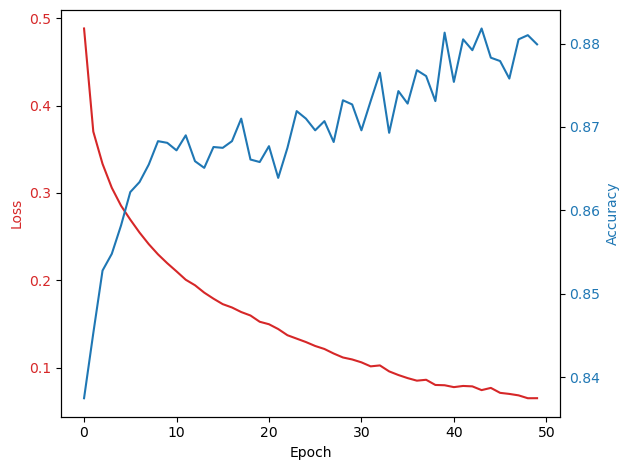

In [6]:
mlp = MultilayerPerceptron(train_set, test_set, epochs=50)
mlp.fit()
mlp.plot_metrics()


In [ ]:
from math import sqrt
def check(x):
    for i in range(2,int(sqrt(x))+1):
        if not x%i: return False
    return True
print(sum([x for x in range(2,1000 ) if check(x)]))

76127


: 